## Module 4 - Story Telling Exercise

1.	Pick a dataset - ideally the dataset for your Capstone. If for some reason you want to do this on a different data set, you can find one on Mode Analytics or Google's public data sets directory, or pick another one you like from elsewhere.

2.	Get going by asking the following questions and looking for the answers with some code and plots:
    1.	Can you count something interesting?
    2.	Can you find some trends (high, low, increase, decrease, anomalies)?
    3.	Can you make a bar plot or a histogram?
    4.	Can you compare two related quantities?
    5.	Can you make a scatterplot?
    6.	Can you make a time-series plot?
   
3.	Having made these plots, what are some insights you get from them? Do you see any correlations? Is there a hypothesis you would like to investigate further? What other questions do they lead you to ask?

4.	By now you’ve asked a bunch of questions, and found some neat insights. Is there an interesting narrative, a way of presenting the insights using text and plots from the above, that tells a compelling story? As you work out this story, what are some other trends/relationships you think will make it more complete?


# 1. Pick a dataset 

- the dataset I have chosen is a CSV file on Currency Exchange Rate from the US Federal Reserve (http://www.federalreserve.gov/releases/h10/hist/dat00_al.htm)

- data can be found here: https://github.com/RobertodeLai/SB-Excercise/blob/master/fxrates_usd_th_aud_jpy.csv

- the dataset holds daily exchange rates for 3 currency pairs for 10 years - 01Jan2006 to 31May2015

- currency pairs are : USD_THB, USD_AUD and USD_JPY

- the ojective is to study the behavior of USD_THB and how it may be influenced by the 2 key currency pairs in Asia Pacific trading zone, ie. USD_JPY and USD_AUD

# 2. Get going by asking the following questions and looking for the answers with some code and plots:
    Can you count something interesting?
    Can you find some trends (high, low, increase, decrease, anomalies)?
    Can you make a bar plot or a histogram?
    Can you compare two related quantities?
    Can you make a scatterplot?
    Can you make a time-series plot?

In [1]:
# set up the environment for the data exploration
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
# read in the csv file as a df, declaring null values, and initial look at the type of data and data types 
data = pd.read_csv('fxrates_usd_th_aud_jpy.csv', na_values=[' '])
print (data.head())
print ('\n Data Types:')
print (data.dtypes)

       Date  US_THB  US_AUD  US_JPY
0  2-Jan-06     NaN     NaN     NaN
1  3-Jan-06   40.76  0.7379  116.34
2  4-Jan-06   40.43  0.7465  116.31
3  5-Jan-06   40.26  0.7482  115.96
4  6-Jan-06   39.83  0.7528  114.45

 Data Types:
Date       object
US_THB    float64
US_AUD    float64
US_JPY    float64
dtype: object


In [3]:
# drop the null values from df
data= pd.DataFrame(data).dropna()
print (data.head())

       Date  US_THB  US_AUD  US_JPY
1  3-Jan-06   40.76  0.7379  116.34
2  4-Jan-06   40.43  0.7465  116.31
3  5-Jan-06   40.26  0.7482  115.96
4  6-Jan-06   39.83  0.7528  114.45
5  9-Jan-06   39.73  0.7517  114.66


In [4]:
# do a df.describe to have a feel of the key stats of each currency pair - counts, high, low, increase, decrease, anomalies
np.round(data.describe(), 2)

,US_THB,US_AUD,US_JPY
count,2664.00,2664.00,2664.00
mean,32.94,0.88,100.86
std,2.38,0.12,14.70
min,28.60,0.61,75.72
25%,31.10,0.77,88.98
50%,32.45,0.89,101.66
75%,34.59,0.97,115.55
max,40.76,1.10,125.58


** Observations**
- the sample size of each currency pair are even: n= 2664
- the scale of USD exchange rates are quite wide between the currency pairs, eg. mean value from AUD0.88 to JPY100
- it is hard to compare the spread of each currency pair's exchange rate, looking at the 25% and 75% percentile numbers, so it may be better to visualise this with box plots.

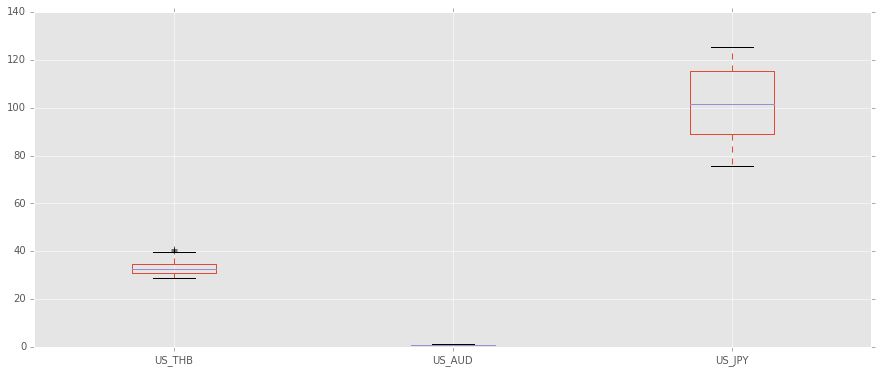

In [5]:
# do a box plot to compare the 3 currency pairs
data.plot(kind="box")

** Observations**
- better appreciation of the scale difference, but too compressed to visualise the distribution spread of each currency pair
- separating out the box plots of each currency pair should enable better visualisation since the plots will be scaled according to the data range of each currency pair

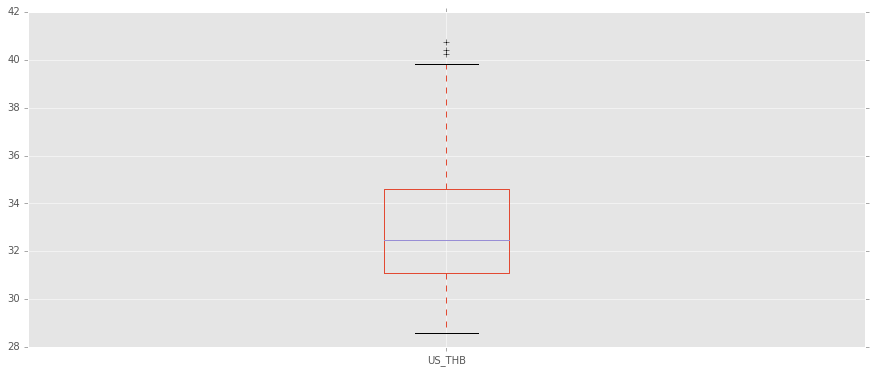

In [6]:
# do a boxplot of US_THB only
data.US_THB.plot(kind="box");

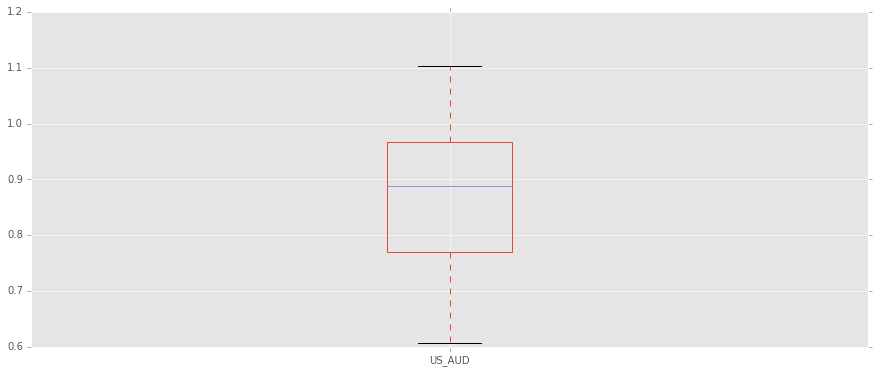

In [7]:
# do a boxplot of US_AUD only
data.US_AUD.plot(kind="box");

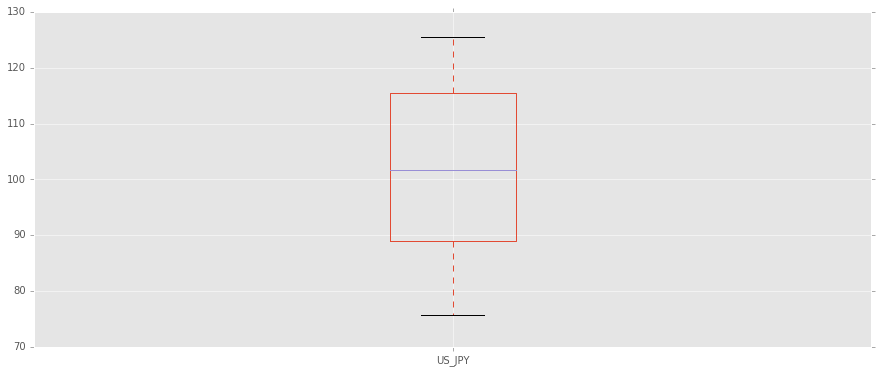

In [8]:
# do a boxplot of US_JPY only
data.US_JPY.plot(kind="box");

** Observations**
- plots 2 and 3 indicates a normal distribution with even tails at both ends
- plot 1 (US_THB) is a bit different, the distribution seems to skew more towards the high exchange rates
- histogram plots should be able to validate this further

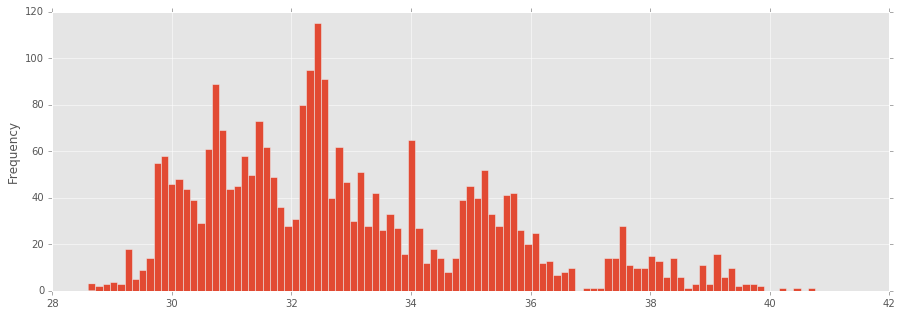

In [9]:
# do a histplot of US_THB only
data.US_THB.plot(kind="hist", figsize=(15,5), bins=100);

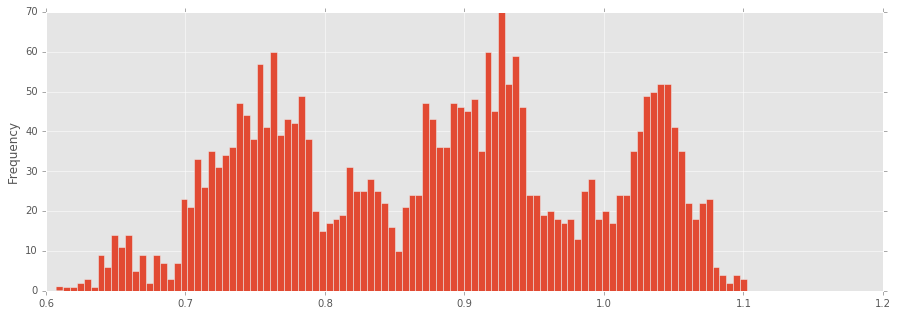

In [10]:
# do a histplot of US_AUD only
data.US_AUD.plot(kind="hist", figsize=(15,5), bins=100);

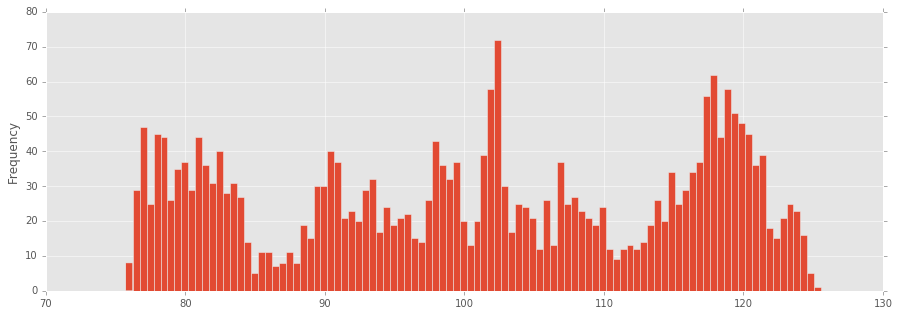

In [11]:
# do a histplot of US_JPY only
data.US_JPY.plot(kind="hist", figsize=(15,5), bins=100);

** Observations**
- Indeed, the US_THB distribution is more skewed for rates > 28.6 THB
- These are time series data, how can I compare the 3 time-series?

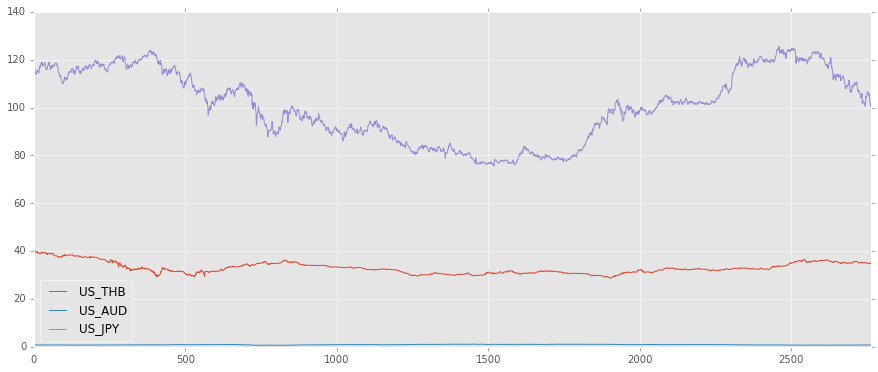

In [12]:
# try a numpy plot to compare the 3 time series pairs
data.plot()

** Observations**
- looks okay, but the scale problem is obscuring the trends of the low range currency pairs, ie. US_AUD and US_THB
- I can improve the chart by 'normalising' the currency pairs first

In [13]:
# normalise the currency pairs by multiplying US_AUD rate by the approx mean ratio of US_THB/US_AUD (~35)
# and dividing the US/JPY rates by approx mean ratio of US_JPY/US_THB (~3)data_adj = data
data_adj = data
data_adj['US_AUD_ADJ'] = data_adj['US_AUD'] * 35
data_adj['US_JPY_ADJ'] = data_adj['US_JPY'] / 3
data_adj = data_adj.drop('US_AUD', 1)
data_adj = data_adj.drop('US_JPY', 1)
print (data_adj.head())

       Date  US_THB  US_AUD_ADJ  US_JPY_ADJ
1  3-Jan-06   40.76     25.8265   38.780000
2  4-Jan-06   40.43     26.1275   38.770000
3  5-Jan-06   40.26     26.1870   38.653333
4  6-Jan-06   39.83     26.3480   38.150000
5  9-Jan-06   39.73     26.3095   38.220000


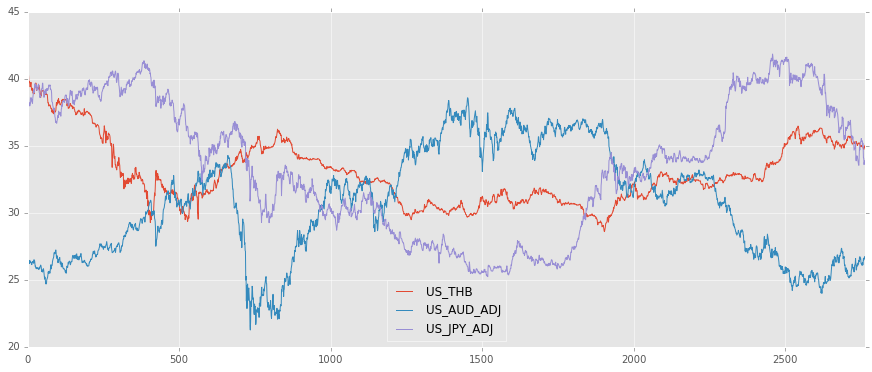

In [14]:
# try the numpy plot again to compare the adjusted time series pairs
data_adj.plot()

** Observations**
- looks better this time, if the exchange rate scale is ignored, there is better relative granularity for the comparisons
- it is obvious the currency pairs do not trend in the same way - this opens up a raft of questions for further exploration of the data using more appropriate time series methods.
- the next step is to test out a simple time-series analysis using just the US_THB currency pair.

In [15]:
# for a start, there is a need to change 'Date' from data type 'object' to TS object
dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%b-%y')

In [16]:
# followed by a ts parse of the same original CVS data
data = pd.read_csv('fxrates_usd_th_aud_jpy.csv', na_values=[' '], parse_dates=[0], index_col=[0], date_parser=dateparse)
print (data.head())

            US_THB  US_AUD  US_JPY
Date                              
2006-01-02     NaN     NaN     NaN
2006-01-03   40.76  0.7379  116.34
2006-01-04   40.43  0.7465  116.31
2006-01-05   40.26  0.7482  115.96
2006-01-06   39.83  0.7528  114.45


In [17]:
# drop the null values and reduce dataset to only US_THB
data= pd.DataFrame(data.US_THB).dropna()
print (data.head())

            US_THB
Date              
2006-01-03   40.76
2006-01-04   40.43
2006-01-05   40.26
2006-01-06   39.83
2006-01-09   39.73


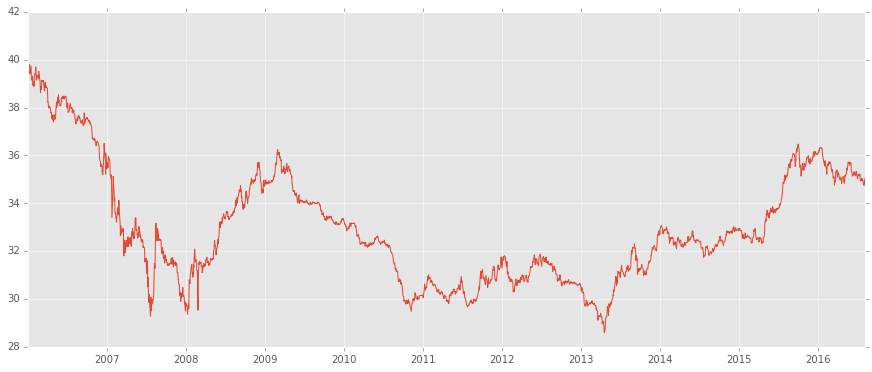

In [18]:
# do a ts plot
plt.plot(data.US_THB)

** Observations**
- the ts plot looks very similar to the numpy plot done earlier (for US_THB trends)
- but the ts method allows further analysis of ts behavior - eg. a stationarity test that replots the ts data using rolling statistics, followed by a Dicker-Fuller test

In [19]:
# this function calculates the rolling stats and Dicker-Fuller stats to test staionarity
from statsmodels.tsa.stattools import adfuller
from pandas import Series
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

C:\Users\rob7l\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\rob7l\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


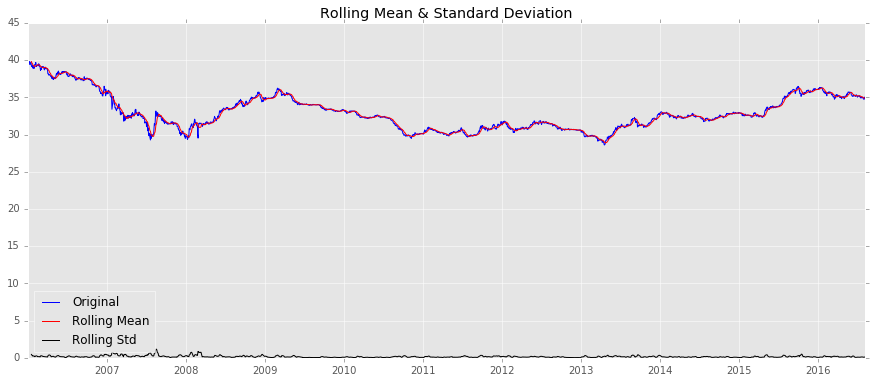

Results of Dickey-Fuller Test:
Test Statistic                   -2.606505
p-value                           0.091660
#Lags Used                       18.000000
Number of Observations Used    2645.000000
Critical Value (5%)              -2.862633
Critical Value (10%)             -2.567352
Critical Value (1%)              -3.432825
dtype: float64


In [20]:
# executes the test with the hypothesis:
# HO - the time series is non-staionary
# H1 - the time series is stationary
test_stationarity(data.US_THB)

** Observations**
- Dickey-Fuller is one of the statistical tests for checking stationarity. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.
- the results of the test above shows a Test Stats of -2.606. This lies between the 5% and 10% critical value. [Test Stats = -2.60 is > -2.86]
- hence, going by a 5% critical value, we accept HO: the TS is non-stationary, ie. further work can be done to eliminate trend and seasonality influences on the time series

# 3. Having made these plots, what are some insights you get from them? Do you see any correlations? Is there a hypothesis you would like to investigate further? What other questions do they lead you to ask?

** Insights:
- null values represents non trading days, eg: public holidays
- although currency trading happens by the seconds, 24 hrs a day, the data collected is a daily data (could be daily average, day close - not known, but so long as this is consistent for the currency pairs it should be ok.
- the data lends itself well for time series modelling
- since the 3 currency pairs use a USD base currency, the scales between currency pairs are quite wide, eg. per USD is 100 yen vs. 0.88 AUD.

** Correlations:
- the currency pairs are not correlated - rate frequency distribution are different, eg. US_THB is more skewed, US_JPY has abrupt tails at both ends.
- the 10-years trend are also not correlated - 
    * US_THB looks quite even over the 10 years. 
    * US_AUD starts low in 2006 and peaks in the middle (2010), then drops off again to about same rates as 2006 by the end of the 10-year period (2015).
    * US_JPY is the opposite of US_AUD - starts high in 2006, hits a trough in 2010, then rise to 2006 levels again in 2015

** Hypothesis:
- using preliminary ts analysis, the null hypothesis of non-stationarity of the data is already proven
- further hypothesis that can be tested after more ts analysis:
    * HO: the currency pairs are influenced by trend and seasonality 
    * H1: the currency pairs are not influenced by trend and seasonality

** Further Questions:
- will the currency pairs be similar, after eliminating trends and seasonality?
- will the currency pair trends be similar?
- will the currency pair seasonalities be similar?

# 4. By now you’ve asked a bunch of questions, and found some neat insights. Is there an interesting narrative, a way of presenting the insights using text and plots from the above, that tells a compelling story? As you work out this story, what are some other trends/relationships you think will make it more complete?

** Interesting Narrative:

Do not assume that currency rates trend in the same way for any currency pair. For example, when we hear that the USD is strong, it does not mean that we should invest in any USD base currency pair, because the behavior of secondary currencies can be totally different

** Compelling Story:

Let's say we have USD to invest in 2011 (about mid-point in the 10-years data plotted) for a profitable return after 3 years (2014). 

If we look at the historical trend from 2006 to 2011 (see plot below) it looks like:
    1. US_AUD is a good investment as it has been trending up
    2. US_JPY is a poor investment as it has been trending down

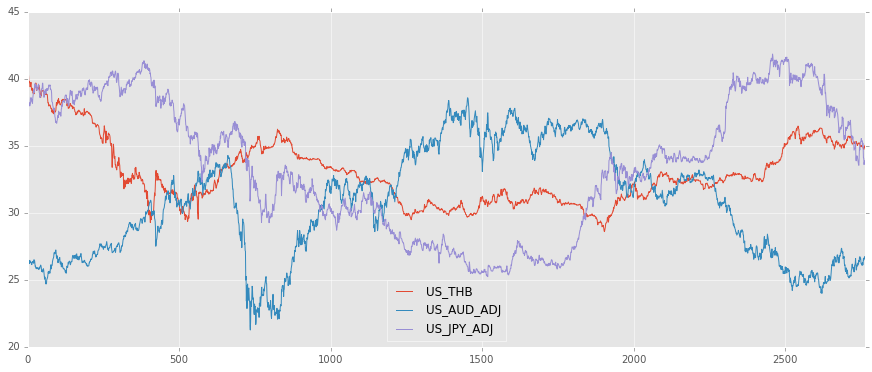

In [21]:
data_adj.plot()

However, from the insights we have gained from the data exploration, we now know that currency pair in the long term does not move in one direction continuously. Then we cannot be sure that by investing in US_AUD in 2011, we will make a profit in 2014. In fact, the US_AUD bucked the upward trend and started to drop in price, whereas the US_JPY trend reversed and gained in value.

The data insights will want us to know more about why when the base currency (USD) is the same, the secondary currencies (AUD vs JPY) behave differently.  

** To make the story more complete: 

A lot more data exploration and analysis can be done to: 

1. Correlate macro and micro economic indicators (such as commodity, bonds, interest rates, GDP, trade balance, etc.) with secondary currencies to establish why the price deviate from the USD base currency pattern. 

2. Break the trend to understand where seasonality is impacted by long or short-term interruptions (eg. there was a sharp drop in US_AUD price around 2008, before the rates rebound to higher rates around 2010. What macro or micro economic events has cased this anamoly? 

3. It is also useful to look at cross-pairs (i.e. non-US base currency, eg. AUD_JPY) to get deeper insights to the relationships between non-USD currencies, and again how they are related to macro and micro economic indicators.